### This file contains quality check on the original dtseries, it contains: 
#### tSNR: temporal signal-to-noise ratio
#### Mean time course in different ROI


In [1]:
import nibabel as nib
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.io as sio
import time, os, pickle, json
import matplotlib.pyplot as plt
import matplotlib as mpl
from os.path import join as pjoin
from sklearn.preprocessing import StandardScaler

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams.update({'font.size': 12, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [2]:
# generate surface map for tSNR
def save_ciftifile(data, filename):
    template = '/nfs/z1/zhenlab/BrainImageNet/NaturalObject/data/bold/Analysis_derivatives/ciftify/sub-core02/MNINonLinear/Results/ses-ImageNet01_task-object_run-1/ses-ImageNet01_task-object_run-1_Atlas.dtseries.nii'
    ex_cii = nib.load(template)
    if len(data.shape) > 1:
        ex_cii.header.get_index_map(0).number_of_series_points = data.shape[0]
    else:
        ex_cii.header.get_index_map(0).number_of_series_points = 1
        data = data[np.newaxis, :]
    nib.save(nib.Cifti2Image(data.astype(np.float32), ex_cii.header), filename)
    
def tsnr(data):
    mean = data.mean(axis=-1)
    std = data.std(axis=-1)
    return np.nan_to_num(mean/std)

ses-action01_task-action_run-1 in sub-01
ses-action01_task-action_run-10 in sub-01
ses-action01_task-action_run-11 in sub-01
ses-action01_task-action_run-12 in sub-01
ses-action01_task-action_run-2 in sub-01
ses-action01_task-action_run-3 in sub-01
ses-action01_task-action_run-4 in sub-01
ses-action01_task-action_run-5 in sub-01
ses-action01_task-action_run-6 in sub-01
ses-action01_task-action_run-7 in sub-01
ses-action01_task-action_run-8 in sub-01
ses-action01_task-action_run-9 in sub-01
ses-action01_task-action_run-1 in sub-02
ses-action01_task-action_run-10 in sub-02
ses-action01_task-action_run-11 in sub-02
ses-action01_task-action_run-12 in sub-02
ses-action01_task-action_run-2 in sub-02
ses-action01_task-action_run-3 in sub-02
ses-action01_task-action_run-4 in sub-02
ses-action01_task-action_run-5 in sub-02
ses-action01_task-action_run-6 in sub-02
ses-action01_task-action_run-7 in sub-02
ses-action01_task-action_run-8 in sub-02
ses-action01_task-action_run-9 in sub-02
ses-action

<ipython-input-2-f2a45914d1fe>:15: RuntimeWarning: invalid value encountered in true_divide
  return np.nan_to_num(mean/std)


ses-action01_task-action_run-1 in sub-05
ses-action01_task-action_run-10 in sub-05
ses-action01_task-action_run-11 in sub-05
ses-action01_task-action_run-12 in sub-05
ses-action01_task-action_run-2 in sub-05
ses-action01_task-action_run-3 in sub-05
ses-action01_task-action_run-4 in sub-05
ses-action01_task-action_run-5 in sub-05
ses-action01_task-action_run-6 in sub-05
ses-action01_task-action_run-7 in sub-05
ses-action01_task-action_run-8 in sub-05
ses-action01_task-action_run-9 in sub-05
ses-action01_task-action_run-1 in sub-06
ses-action01_task-action_run-10 in sub-06
ses-action01_task-action_run-11 in sub-06
ses-action01_task-action_run-12 in sub-06
ses-action01_task-action_run-2 in sub-06
ses-action01_task-action_run-3 in sub-06
ses-action01_task-action_run-4 in sub-06
ses-action01_task-action_run-5 in sub-06
ses-action01_task-action_run-6 in sub-06
ses-action01_task-action_run-7 in sub-06
ses-action01_task-action_run-8 in sub-06
ses-action01_task-action_run-9 in sub-06
ses-action

<ipython-input-3-2cbc7707b49b>:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(fig.get_yticks().astype(int), size = 15)


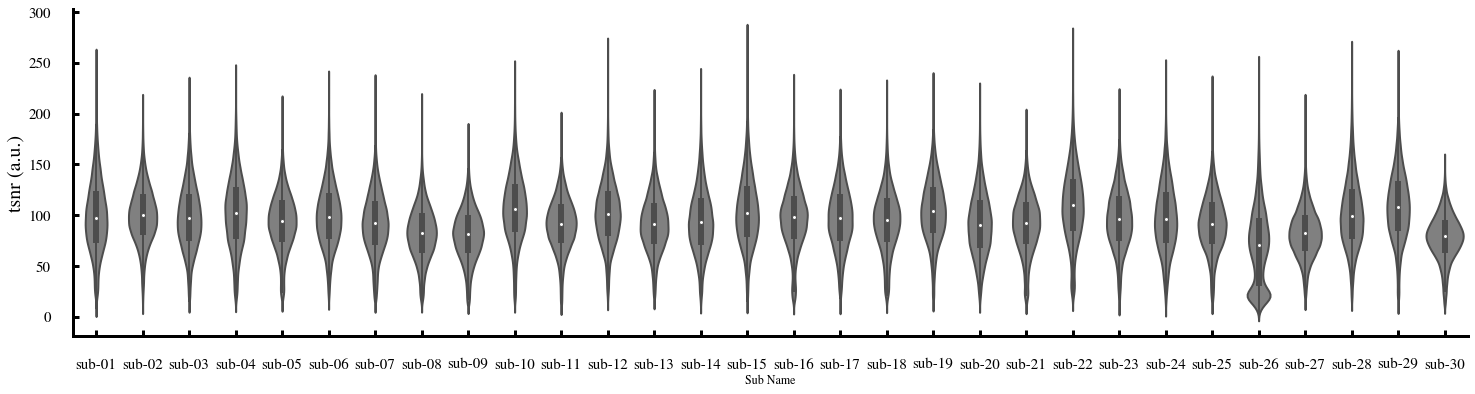

In [3]:
def get_time_series(sub_name, ciftify_dir, result_dir, n_run, roi_mat = None):

    # MNINolinear/Results disposit all the runs data
    _result_path = pjoin(ciftify_dir, sub_name, result_dir)
    # extract the action runs
    task = 'action' 
    data_runs = [_ for _ in os.listdir(_result_path) if ('action' in _) and (task in _) \
                    and ('discard' not in _) and int(_.split('-')[-1].split('_')[0])<=12]
    data_runs.sort() # sort() to be [1 10 11 12 2 -- 9]
    # initialize the mapping dict
    stim_resp_map = {}
    # loop run
    for single_run in data_runs[:n_run]:
        print(single_run + ' in ' + sub_name)
        # prepare .feat/GrayordinatesStats dir
        nii_dir = '{0}'.format(single_run)
        nii_path = pjoin(ciftify_dir, sub_name, result_dir, nii_dir)
        # loop trial 
        nii_file = pjoin(nii_path, '{0}_Atlas.dtseries.nii'.format(single_run))
        dt_data = nib.load(nii_file).get_fdata()
        if roi_mat:
            # only save roi
            stim_resp_map[single_run] = np.array(dt_data[:,roi_mat])
        else:
            stim_resp_map[single_run] = np.array(dt_data)
    # transfer to matrix
    time_series = np.dstack(tuple([stim_resp_map[_] for _ in list(stim_resp_map.keys())]))
    time_series = time_series.transpose((2,1,0)).astype(np.float32)
    return time_series
    
# load data
ciftify_dir = '/nfs/z1/userhome/ZhouMing/workingdir/BIN/action/data/bold/derivatives/ciftify'
result_dir = 'MNINonLinear/Results/'
beta_path = '/nfs/z1/zhenlab/BrainImageNet/action/data/bold/derivatives/beta'

n_run = 12
sub_names = sorted([i for i in os.listdir(beta_path) if i.startswith('sub-')]) 
# Violin plot of the tsnr distribution
df = pd.DataFrame()
tsnr_mean = np.zeros(1)

for sub_name in sub_names:
    # handle special subject
    tsnr_sub_path = pjoin(beta_path, sub_name, f'{sub_name}_action-tsnr.npy')
    if not os.path.exists(tsnr_sub_path):
        dtseries_sum = get_time_series(sub_name, ciftify_dir, result_dir, n_run)
        tsnr_sum = np.zeros_like(dtseries_sum[:,:,0])
        n_run = dtseries_sum.shape[0]   
        for run in range(n_run):
            run_data = dtseries_sum[run,:,:]
            tsnr_sum[run, :] = tsnr(run_data)
        tsnr_sub = tsnr_sum.mean(axis=0)
        np.save(tsnr_sub_path, tsnr_sub)
    else:
        tsnr_sub = np.load(tsnr_sub_path)
    # concatenate data
    tsnr_mean = np.concatenate((tsnr_mean, tsnr_sub[:59412]), axis=0)
# delete first value
tsnr_mean = np.delete(tsnr_mean, 0, axis=0).astype(np.float32)
label = np.repeat(sub_names, 59412)
# merge data and label into df
df['tsnr (a.u.)'] = tsnr_mean
df['Sub Name'] = label
plt.figure(figsize=(25, 6))

fig = sns.violinplot(x="Sub Name", y="tsnr (a.u.)", data=df, color='grey', linewidth=2)
fig.set_yticklabels(fig.get_yticks().astype(int), size = 15)
ax = plt.gca()

ax.tick_params(labelsize=15, width=3, length=6, direction="in", pad=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
plt.ylabel("tsnr (a.u.)", size = 20)

# save tsnr map
beta_path = '/nfs/z1/zhenlab/BrainImageNet/action/data/bold/derivatives/beta'
result_path = '/nfs/z1/userhome/ZhouMing/workingdir/BIN/action/utils/data_paper/result'

sub_names = sorted([i for i in os.listdir(beta_path) if i.startswith('sub-')]) 
tsnr_merge = np.zeros((30, 91282))
for idx,sub_name in enumerate(sub_names):
    tsnr_merge[idx] = np.load(pjoin(beta_path, sub_name, f'{sub_name}_action-tsnr.npy'))
tsnr_map = tsnr_merge.mean(axis=0)
save_ciftifile(tsnr_map, pjoin(result_path, 'tsnr_map_action.dtseries.nii'))


#### Mean time course in different ROI

In [65]:
# prepare ROI info
def save_ciftifile(data, filename):
    template = '/nfs/z1/zhenlab/BrainImageNet/NaturalObject/data/bold/Analysis_derivatives/ciftify/sub-core02/MNINonLinear/Results/ses-ImageNet01_task-object_run-1/ses-ImageNet01_task-object_run-1_Atlas.dtseries.nii'
    ex_cii = nib.load(template)
    ex_cii.header.get_index_map(0).number_of_series_points = data.shape[0]
    nib.save(nib.Cifti2Image(data.astype(np.float32), ex_cii.header), filename)

def roi_mask(roi_name):
    """
        roi_name : list or str
    """
    # load reference info
    main_path = '/nfs/z1/zhenlab/BrainImageNet/Analysis_results/'
    roi_name_path = pjoin(main_path, 'roilbl_mmp.csv')
    roi_names = pd.read_csv(roi_name_path)
    roi = sio.loadmat(pjoin(main_path, 'MMP_mpmLR32k.mat'))['glasser_MMP']  # 1x59412

    # start load name
    roi_index = []
    if isinstance(roi_name, str):
        roi_tmp_index = roi_names.loc[roi_names.isin([f'L_{roi_name}_ROI']).any(axis=1)].index[0]+1
        roi_index.extend([roi_tmp_index, roi_tmp_index+180])
        mask = np.asarray([True if x in roi_index else False for x in roi[0]])
    else:
        for name in roi_name:
            roi_tmp_index = roi_names.loc[roi_names.isin([f'L_{name}_ROI']).any(axis=1)].index[0]+1
            roi_index.extend([roi_tmp_index, roi_tmp_index+180])
        mask = np.asarray([True if x in roi_index else False for x in roi[0]])
    return mask

# define path
main_path = '/nfs/z1/zhenlab/BrainImageNet/Analysis_results/'
roi_path = pjoin(main_path, 'MMP_mpmLR32k.mat')
roi_name_path = pjoin(main_path, 'roilbl_mmp.csv')
network_path = '/nfs/z1/atlas/ColeAnticevicNetPartition/cortex_parcel_network_assignments.mat'
roi_correspond = sio.loadmat(roi_path)['glasser_MMP']
roi_names = pd.read_csv(roi_name_path)
network = sio.loadmat(network_path)['netassignments'] 
network = [x[0] for x in network]

Ventral_name = ['V8', 'PIT', 'FFC', 'VVC', 'VMV1', 'VMV2', 'VMV3']
Dorsal_name = ['V3A', 'V3B', 'V6', 'V6A', 'V7', 'IPS1', 'V3CD', 'V4t', 'LO1', 'LO2', 'LO3', 'FST', 'MST', 'MT', 'PH']

roi_sum = ['Ventral', 'Dorsal']
for roi in roi_sum:
    exec(f'{roi}_mask = roi_mask({roi}_name)')
    print(eval(f'{roi}_mask').sum())

select_network = [8] 
roi_index = [idx+1 for idx,x in enumerate(network) if x in select_network]
Auditory_mask = np.asarray([True if x in roi_index else False for x in roi_correspond[0]])
print(Auditory_mask.sum())

1244
2489
1664


In [69]:
def get_time_course(sub_name):

    # define paths
    ciftify_dir = '/nfs/z1/userhome/ZhouMing/workingdir/BIN/action/data/bold/derivatives/ciftify'
    result_dir = 'MNINonLinear/Results/'
    # MNINolinear/Results disposit all the runs data
    _result_path = pjoin(ciftify_dir, sub_name, result_dir)
    # extract the action runs
    task = 'action' 
    data_runs = [_ for _ in os.listdir(_result_path) if ('action' in _) and (task in _) \
                    and ('discard' not in _) and int(_.split('-')[-1].split('_')[0])<=12]
    data_runs.sort() # sort() to be [1 10 11 12 2 -- 9]
    # initialize the mapping dict
    time_course = np.zeros((len(data_runs), 144, 59412))
    # loop run
    for run_idx, single_run in enumerate(data_runs):
        print(single_run + ' in ' + sub_name)
        # prepare .feat/GrayordinatesStats dir
        nii_dir = '{0}'.format(single_run)
        nii_path = pjoin(ciftify_dir, sub_name, result_dir, nii_dir)
        # loop trial 
        nii_file = pjoin(nii_path, '{0}_Atlas.dtseries.nii'.format(single_run))
        dt_data = nib.load(nii_file).get_fdata()[:, :59412]
        # scale data
        # scaler = StandardScaler()
        # dt_data = scaler.fit_transform(dt_data)
        # locate the stimulus onset period and compute its mean form
        # In a block, stimulus present 2s and offset 2s, with 5 stimulus presenting like this, 
        # followed with a 4s blank. We will average the stimulus presenting period
        stim_time_course = dt_data[6:-6, :]
        # task_condition = stim_time_course.mean(axis=0)[2:].reshape(5, 2, 59412).mean(axis=0)
        base_condition = dt_data[:6, :].mean(axis=0)
        # compute signal change: between the baseline condition (B) and the task condition (T)
        # percent signal change = (T-B)/B×100%
        time_course[run_idx] = (stim_time_course - base_condition) / base_condition * 100
        # (task_condition - base_condition) / base_condition * 100
    return time_course.mean(axis=0)
    
# load data
beta_path = '/nfs/z1/zhenlab/BrainImageNet/action/data/bold/derivatives/beta'
sub_names = sorted([i for i in os.listdir(beta_path) if i.startswith('sub-') and int(i.split('-')[-1])<=30]) 

time_course_sum = np.zeros((len(sub_names), 144, 59412))
for sub_idx, sub_name in enumerate(sub_names):
    time_course_sum[sub_idx] = get_time_course(sub_name)

# # compute mean and std across subjects
# time_course_info = np.zeros((2, 144, 59412))
# time_course_info[0] = time_course_sum.mean(axis=0)
# time_course_info[1] = time_course_sum.std(axis=0)


ses-action01_task-action_run-1 in sub-01
ses-action01_task-action_run-10 in sub-01
ses-action01_task-action_run-11 in sub-01
ses-action01_task-action_run-12 in sub-01
ses-action01_task-action_run-2 in sub-01
ses-action01_task-action_run-3 in sub-01
ses-action01_task-action_run-4 in sub-01
ses-action01_task-action_run-5 in sub-01
ses-action01_task-action_run-6 in sub-01
ses-action01_task-action_run-7 in sub-01
ses-action01_task-action_run-8 in sub-01
ses-action01_task-action_run-9 in sub-01
ses-action01_task-action_run-1 in sub-02
ses-action01_task-action_run-10 in sub-02
ses-action01_task-action_run-11 in sub-02
ses-action01_task-action_run-12 in sub-02
ses-action01_task-action_run-2 in sub-02
ses-action01_task-action_run-3 in sub-02
ses-action01_task-action_run-4 in sub-02
ses-action01_task-action_run-5 in sub-02
ses-action01_task-action_run-6 in sub-02
ses-action01_task-action_run-7 in sub-02
ses-action01_task-action_run-8 in sub-02
ses-action01_task-action_run-9 in sub-02
ses-action

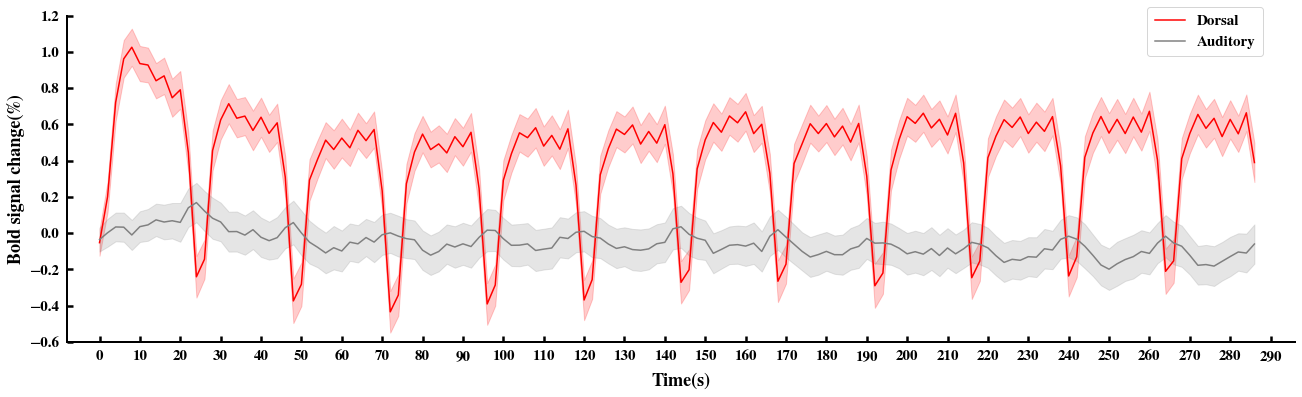

In [80]:
roi_sum = ['Dorsal', 'Auditory']

colors = ['red', 'grey']
plt.figure(figsize=(22, 6))
n_time_point = time_course_info.shape[1]

for roi_idx, roi in enumerate(roi_sum):
    time_course_roi = time_course_sum[:, :, eval(f'{roi}_mask')].mean(axis=-1)
    time_course_mean = time_course_roi.mean(axis=0)
    time_course_std = np.sqrt(time_course_roi.std(axis=0)/(len(sub_names)))
    # plot line
    plt.plot(range(n_time_point), time_course_mean, color=colors[roi_idx], label=roi, lw=1.5)
    plt.fill_between(range(n_time_point), time_course_mean - time_course_std, time_course_mean + time_course_std, 
                     color=colors[roi_idx], alpha=0.2)

# plt.xticks(np.arange(n_time_point), ['%d'%((i)*2) for i in range(n_time_point)], rotation=45, weight='bold', fontsize=8)
plt.xticks(np.linspace(0, n_time_point+1, 30), np.linspace(0, (n_time_point+1)*2, 30, dtype=int), weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=15)
plt.legend(loc='upper right', prop={'size':15, 'weight':'bold'}, bbox_to_anchor=[0.98, 1.05], borderpad=0.5)
plt.ylabel('Bold signal change(%)', weight='bold', fontsize=18)
plt.xlabel('Time(s)', weight='bold', fontsize=18, labelpad=10)

ax = plt.gca()
ax.tick_params(labelsize=15, width=2.5, length=6, direction="in", pad=8)
ax.set_xlim(-4, 148)
ax.set_ylim(-0.6, 1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

In [38]:
np.linspace(0, (n_time_point+1)*2, 30)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290.])

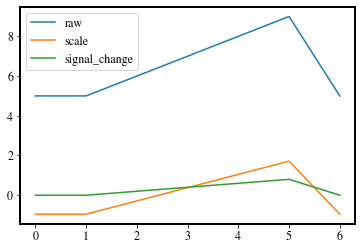

In [23]:
a = np.array([5, 5, 6, 7, 8, 9, 5])
scaler = StandardScaler()
scale_a = (a - a.mean())/a.std()
signal_change_a = (a - 5)/5

plt.plot(a, label='raw')
plt.plot(scale_a, label='scale')
plt.plot(signal_change_a, label='signal_change')
plt.legend()
